#Machine Learning (Polynomial Regression): 
Abdelraouf Khorshed (5000267)
- Produce a polynomial regression model with degree (d)
- Try different higher order models (max d = 10)
- Choose optimal model, compare performance measure outputs to simple linear regression & ridge regression with CROSS VALIDATION. 
- Evalutaion metrics should be used ('discussed in tutorial 3')
- Predict sales for the following expidenture: 149k on TV, 22k on Radio, and 12k on Newspaper Ads

Polynomial regression is a basic linear regression with a higher order degree. This higher-order degree allows our equation to fit advanced relationships, like curves and sudden jumps. As the order increases in polynomial regression, we increase the chances of overfitting and creating weak models.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
# seperate out our x and y values
x_values = df[['TV','radio', 'newspaper']].values
y_values = df['sales'].values

We're going to create a loop and create a model for each degree and calculate the error and compare all the model errors. 

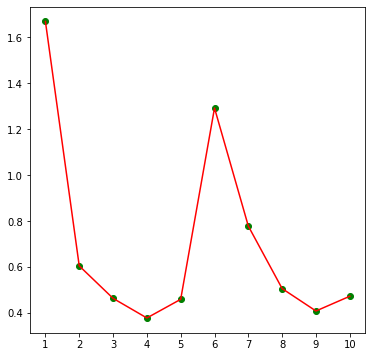

In [ ]:
number_degrees = [1 ,2 ,3 ,4 ,5 ,6 ,7 ,8, 9, 10] # array of the range of degrees.
plt_mean_squared_error = [] #empty array for rmse

for degree in number_degrees:

# Polynomial features are those features created by raising existing features to an exponent.
# Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.
# For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
   poly_model = PolynomialFeatures(degree=degree)
  
# transform out polynomial features
#The fit method is calculating the mean and variance of each of the features present in our data.
# The transform method is transforming all the features using the respective mean and variance.
# fir_transform is basically .fit().transform()
   initial_poly_x_values = poly_model.fit_transform(x_values)

# We use linear regression as a base. 
# Polynomial regression is a linear model, that’s why we import LinearRegression(), we use PolynomialFeatures
# just to transform the features to the needed format. 
   intial_poly_model = LinearRegression()
   intial_poly_model.fit(initial_poly_x_values, y_values)
   y_pred = intial_poly_model.predict(initial_poly_x_values)
  
# calculate the rsme and put it in the rmse array.
   plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))

#Visualize the rsme for each degree accordingly 
plt.figure(figsize=(6,6))
x = np.arange(0, 11, 1)
plt.xticks(x)
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 

As we can see the degree with the lowest error is degree = 4.We create a new polynomial model with degree 4 and use cross validation to compare it to Linear and Ridge Regression.



In [ ]:
new_x = np.array([[149.0, 22.0, 12.0]]) #we use this format because predict & fit needs to be given a 2D array.
#new_x.reshape(1, -1)

Polynomial Regression Model:

In [ ]:
poly_model_d4 = PolynomialFeatures(degree=4)
poly_x_values_d4 = poly_model_d4.fit_transform(x_values)

poly_model_d4 = LinearRegression()
# scores obtained from cross_val_score regressor are by default 'r2'.
# we change the behavior by specifying the scoring parameter and change the sign since it report in a negative value.
print("Average polynomial regression RMSE score after cross validation, k=10: ") 
print(-1*(np.mean(cross_val_score(poly_model_d4, poly_x_values_d4, y_values, scoring='neg_mean_squared_error', cv=10))))


Average polynomial regression RMSE score after cross validation, k=10: 
5.13914679104716


In [ ]:
cv_rmse = []

for d in range (1,11):
  poly_temp = PolynomialFeatures(degree=d)
  poly_x_values_temp = poly_temp.fit_transform(x_values)

  poly_temp2 = LinearRegression()
  cv_rmse.append(-1*(np.mean(cross_val_score(poly_temp2, poly_x_values_temp, y_values, scoring='neg_mean_squared_error', cv=10))))

print("Minimum RMSE: ", min(cv_rmse))
print("Optimal polynomial degree:", cv_rmse.index(min(cv_rmse)) + 1)
  #print(-1*(np.mean(cross_val_score(poly_temp2, poly_x_values_temp, y_values, scoring='neg_mean_squared_error', cv=5))))

Minimum RMSE:  0.3190220306219115
Optimal polynomial degree: 3


Despite the fact the degree = 4 gave us the lowest RSME, the model seems to overfit. We used reguralization in the form of cross validation to counter overfitting which therefore gave us the optimal degree = 3 as it gave a better average rmse score. 

In [ ]:
poly_model_d3 = PolynomialFeatures(degree=3)
poly_x_values_d3 = poly_model_d3.fit_transform(x_values)

optimal_model_d3 = LinearRegression()
optimal_model_d3.fit(poly_x_values_d3, y_values)
print("Average polynomial regression RMSE score after cross validation, k=10: ")
print(-1*(np.mean(cross_val_score(optimal_model_d3, poly_x_values_d3, y_values, scoring='neg_mean_squared_error', cv=10))))

Average polynomial regression RMSE score after cross validation, k=10: 
0.3190220306219115


In [ ]:
#Prediction:
poly_new_x = poly_model_d3.fit_transform(new_x)
poly_new_y_pred = optimal_model_d3.predict(poly_new_x)

print("For 149k on TV, 22k on Radio, and 12k on Newspaper Ads: ")
print("Polynomial sales prediction:", poly_new_y_pred)

For 149k on TV, 22k on Radio, and 12k on Newspaper Ads: 
Polynomial sales prediction: [14.64501014]


Linear Regression Model:

In [ ]:
simple_linear_model = LinearRegression()
simple_linear_model.fit(x_values, y_values)
print("Average simple linear regression RMSE score after cross validation, k=10: ")
print(-1*(np.mean(cross_val_score(simple_linear_model, x_values, y_values, scoring='neg_mean_squared_error', cv=10))))

Average simple linear regression RMSE score after cross validation, k=10: 
3.0599676181185145


In [ ]:
#Prediction: 
linear_new_y_pred = simple_linear_model.predict(new_x)
print("For 149k on TV, 22k on Radio, and 12k on Newspaper Ads: ")
print("Linear sales prediction:", linear_new_y_pred)

For 149k on TV, 22k on Radio, and 12k on Newspaper Ads: 
Linear sales prediction: [13.893032]


Ridge Regression Model:

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Because in linear regression the value of the coefficients is partially determined by the scale of the feature,
# and in regularized models all coefficients are summed together, we must make sure to standardize
# the feature prior to training.
scaler = StandardScaler()
X_std = scaler.fit_transform(x_values)

# Create ridge regression with three possible alpha values
ridge_regr = RidgeCV(alphas=[0.1, 1.0, 10.0])

# We fit ridge regression with the ideal value for alpha
ridge_model = ridge_regr.fit(X_std, y_values)

print("Average ridge regression RMSE score after cross validation, k=10: ")
print(-1*(np.mean(cross_val_score(ridge_model, x_values, y_values, scoring='neg_mean_squared_error', cv=10))))

Average ridge regression RMSE score after cross validation, k=10: 
3.0598669303928028


In [ ]:
#Prediction :
new_x_std = scaler.fit_transform(new_x) # We need to standardize the new features
ridge_new_y_pred = ridge_model.predict(new_x_std)
print("For 149k on TV, 22k on Radio, and 12k on Newspaper Ads: ")
print("Ridge sales prediction:", ridge_new_y_pred)

For 149k on TV, 22k on Radio, and 12k on Newspaper Ads: 
Ridge sales prediction: [14.0225]
